# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [54]:
# Lets start oour project with Mounting the data to drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetterCapstoneProjects/SupervisedML(Regression)/SeoulBikeData.csv',encoding='ISO-8859-1')

In [57]:
#displaying the first 5 rows of the dataset, to check if the dataset is the same and to have a brief look at the distribution of the data among the various features
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [58]:
#to display the size of the dataset, that is the number of rows and columns
df.shape

(8760, 14)

there are 8760 rows and 14 columns, that is there are 8760 different observations or datapoints and 14 different variables

# Exploratory Data Analysis

In [59]:
#let us find out the datatypes of the various features in the dataframe
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [60]:
#let us find out the basic details of the features, their mean, standard deviation, max and min value and others
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


The describe method mostly displays basic descriptive statistics like mean, median, interquartile ranges, max and min values

In [61]:
# This gives us the total count of null values in all of the features.
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**There are no null values in any of the features in the entire dataset**

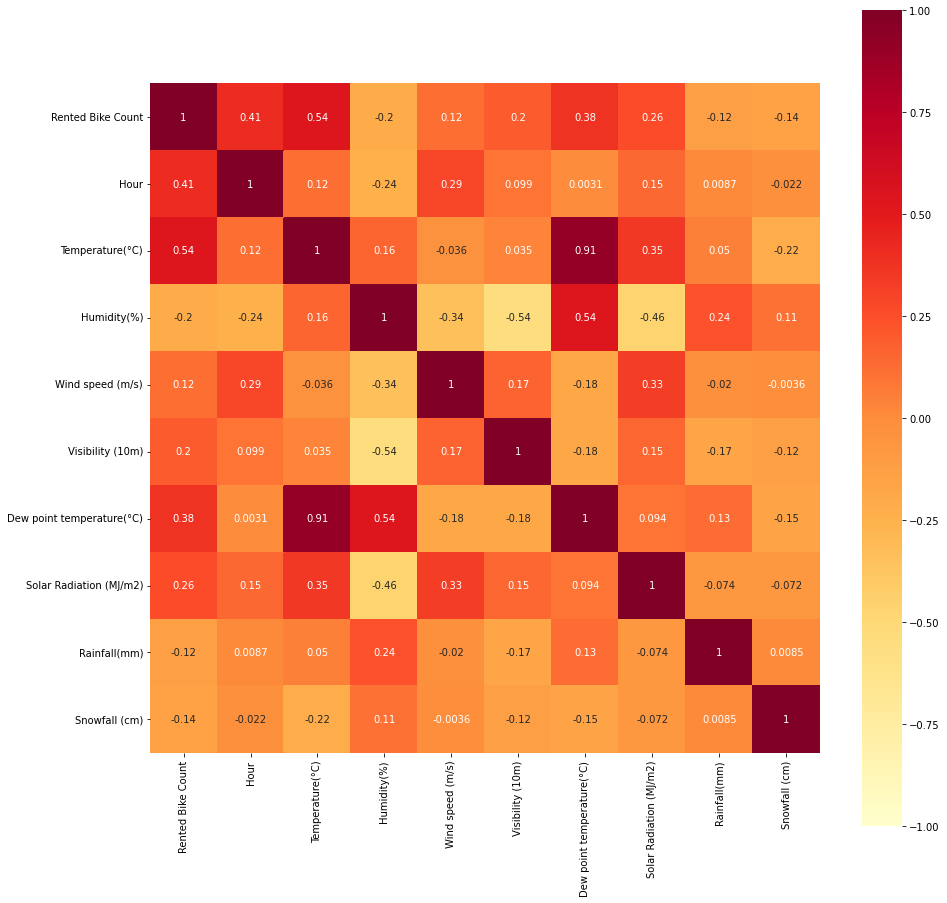

In [62]:
# let's plot correlations inbetween the variables.
plt.figure(figsize=(15,15))
sns.heatmap(df.corr("pearson"),vmin=-1, vmax=1, cmap='YlOrRd', annot=True, square=True);

**The correlation between Dew Point Temperature and Temperature point is very high(0.91) and in order to avoid multicollinearity, we have to remove one of the input features. Let us remove Dew Point Temperature rather than removing Temperature which is a more important feature than dew point temperature**

In [63]:
# dropping Dew Point Temperature feature
df.drop(columns=['Dew point temperature(°C)'], inplace=True)

**Data Visualizations**

In [64]:
#to create a new variable called day_or_night to day or night depending on the hour of the day
df['day_or_night']=df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

In [65]:
#variables to store the date to datetime format and to store the day of the week
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")
df['WeekDay']=df["Date"].dt.day_name() 

In [66]:
#storing the month of the year in a separate column called Month
df['Month']=df['Date'].dt.month

**Datetime format added, the day of the week and month of the year also have been stored.**

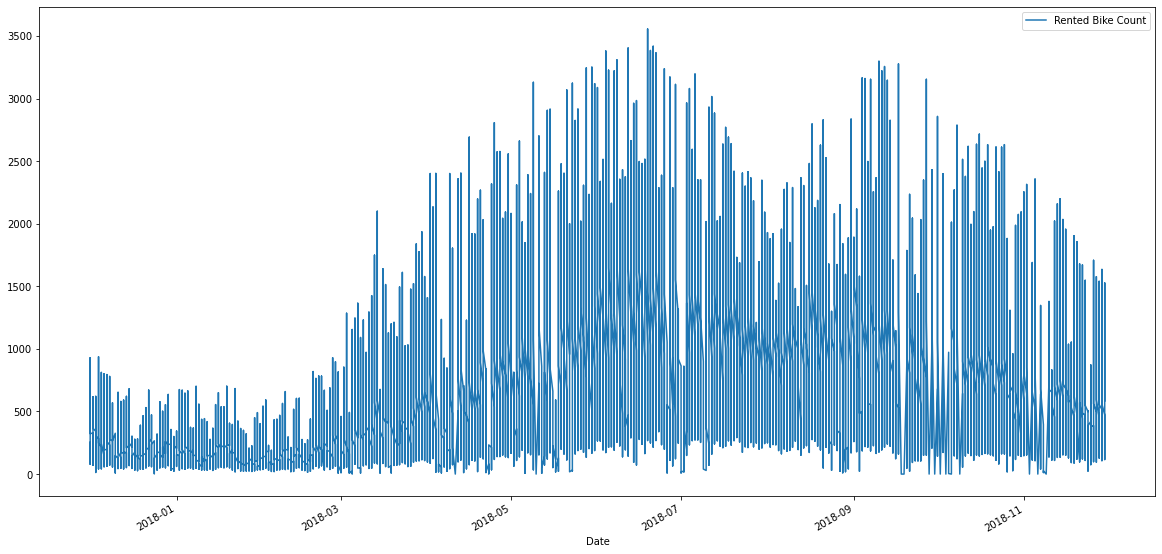

In [67]:
#lineplot of the number of bikes rented against the month of the year, to check if there is any relation
df.plot(x='Date',y='Rented Bike Count',kind='line', figsize=(20,10))

**After the month of March the demand for bikes has shot up manifold**

In [68]:
df_Seasons=pd.DataFrame(df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
df_Seasons.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


**Most bike rentals were made in the summer months**

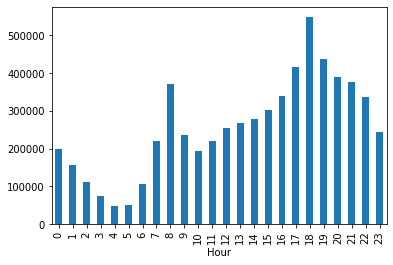

In [69]:
#plot of the number of bikes rented against the hour of the day.
df.groupby('Hour').sum()['Rented Bike Count'].plot.bar()

Most of the rentals are made at 8 in the morning and from 5pm to 7pm, mostly during the office peak hours

**Checking the number of rental on the basis of day of the week**

In [70]:
#the number of bikes rented in the entire dataset agianst the week of the day
df1Days=pd.DataFrame(df.groupby('WeekDay').sum()['Rented Bike Count'].sort_values(ascending=False))
df1Days.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
WeekDay,
Friday,950334
Wednesday,923956
Monday,911743
Saturday,885492
Thursday,861999
Tuesday,858596
Sunday,780194


Most rentals are made on wednesday and friday

**Let us visualize the division of rentals in day and night**

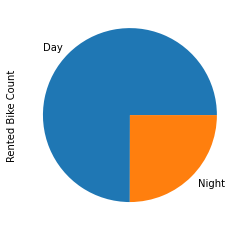

In [71]:
df.groupby('day_or_night').sum()['Rented Bike Count'].plot.pie()

Conclusion- most of the rentals are made in the day

**Plotting the number of rentals against the snowfall in cm, to check the relation between snowfall and number of bike rentals**

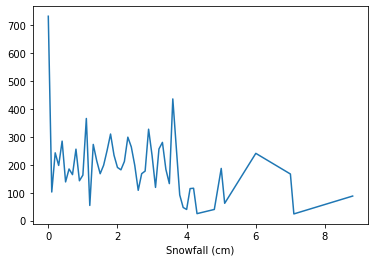

In [72]:
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

Hence, it is natural to rent a bike when the snowfall is minimum as it is easy to ride it

# Data Modelling

In [73]:
#importing the necessary regressor models, validation models and evaluation metrics 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**Train-Test split modelling**

Label Encoding is done for few featuers that are of string data type, like Seasons, Functioning Day, WeekDay and day_or_night. These features are important and connot be just removed, rather they must be encoded.

In [74]:
#train test split model
label_encoder = preprocessing.LabelEncoder()
df['Seasons']= label_encoder.fit_transform(df['Seasons'])
df['Functioning Day']= label_encoder.fit_transform(df['Functioning Day'])
df['WeekDay']= label_encoder.fit_transform(df['WeekDay'])
df['day_or_night']= label_encoder.fit_transform(df['day_or_night'])
X=df.drop(columns=['Rented Bike Count','Date','Holiday'],axis =1)
y=df.iloc[:,1]

X contains all the input features important for predicting the y class variable(Rented Bike Count). All the features that do not give much information are removed. Holiday and Functioning Day features are redundant, only one of them is enough.

In [75]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day,day_or_night,WeekDay,Month
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,1,1,0,12
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,1,1,0,12
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,1,1,0,12
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,1,1,0,12
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,1,1,0,12


**Now, let us use few Regression models and see which is the most accurate.**

**1. Mutiple Linear Regression**

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [77]:
#fitting the linear regression model on the X_train and y_train
model_linear_reg=linear_model.LinearRegression()
model_linear_reg.fit(X_train,y_train)

LinearRegression()

In [78]:
#predicting the class variable values on the training and testing dataset 
pred_train=model_linear_reg.predict(X_train)
pred_test=model_linear_reg.predict(X_test)

In [79]:
model_linear_reg.intercept_

-280.767466656725

In [80]:
model_linear_reg.coef_

array([ 2.54330519e+01,  3.00075739e+01, -7.48869199e+00,  1.48404693e+01,
        3.59965916e-02, -1.11563615e+02, -5.75524295e+01,  3.03403941e+01,
       -9.59330526e+01,  9.39231921e+02, -1.25528550e+02, -2.17434847e-01,
        2.48985742e+00])

In [81]:
#printing the R2 scores of the training and testing dataset.
Train_r2=r2_score(y_train,pred_train)
Test_r2=r2_score(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mse)
print("The Multiple Linear Regression r2 score for train is {} and for test is {}".format(Train_r2,Test_r2))
print("The Multiple Linear Regression root mean squared error is : ",rmse)

The Multiple Linear Regression r2 score for train is 0.5528116899122115 and for test is 0.5546907091912411
The Multiple Linear Regression root mean squared error is :  425.18668060482105


**Results of the Multiple Linear Regression Model**:
1. The Rsquared score for training and testing is around 55% and 55% respectively.
2. The RMSE value is around 420. Trying out other models is advised as the r2 score is too low.

**Standard Scaling is done on the X_train and X_test data.**

In [82]:
scalerTrain = preprocessing.StandardScaler().fit(X_train)
scalerTest = preprocessing.StandardScaler().fit(X_test)
X_train_Scaled=scalerTrain.transform(X_train)
X_test_Scaled=scalerTest.transform(X_test)

**2. Decision Trees Regressor**

In [83]:
#Decision Tree Regressor model is used and creating an object DT
DT = DecisionTreeRegressor()

parameters_dt = {'max_depth' : list(range(0,20))}
#using the gridSearch for Hyperparameter tuning
gridSearch_DecisionTree=GridSearchCV(DT,parameters_dt,scoring='r2',cv=6)
gridSearch_DecisionTree.fit(X_train_Scaled,y_train)
pred_test_dt=gridSearch_DecisionTree.predict(X_test_Scaled)

best_DecisionTree=gridSearch_DecisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test_Scaled,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than 

Displaying the results

In [84]:
#printing the best parameters and also the R2 score of the training dataset
print('The best Decision Tree R2 score is : {:.2f} \n with max depth = {:.2f} \n \
'.format(gridSearch_DecisionTree.best_score_,gridSearch_DecisionTree.best_params_['max_depth'] ))

The best Decision Tree R2 score is : 0.84 
 with max depth = 12.00 
 


In [85]:
#printing the best parameters and also the R2 score of the testing dataset.
print('The best R2 test score is : {:.2f}\n with max depth = {:.2f}\n \
'.format(bestDecisionTree_testScore,gridSearch_DecisionTree.best_params_['max_depth']))

The best R2 test score is : 0.77
 with max depth = 12.00
 


In [86]:
#let us calculate the RMSE value 
rmse_dt=np.sqrt(mean_squared_error(y_test,pred_test_dt))

In [87]:
print("The root mean squared error for the Decision Trees Regressor on the test dataset is: ", rmse_dt)

The root mean squared error for the Decision Trees Regressor on the test dataset is:  303.19389395292643


**Results of the Decison Trees Model:**
1. The Rsquared score for training and testing is 84% and 77% respectively.
2.  The RMSE value is around 300. 
The r2 score is very good, but trying other models to see if the R2 score increases.

**3. Random Forest Regressor**

In [88]:
#fitting the random forest regressor model on X_train and y_train
RF = RandomForestRegressor()
RF.fit(X_train_Scaled, y_train)

RandomForestRegressor()

In [89]:
#predicting the class variable on the testing dataset
predict_RF=RF.predict(X_test_Scaled)

In [90]:
#predicting the class variable on the training dataset
predict_RF_train=RF.predict(X_train_Scaled)

In [91]:
print("The r2 score obtained for the testing dataset is:",r2_score(y_train,predict_RF_train))

The r2 score obtained for the testing dataset is: 0.9876771514636705


In [92]:
print("The r2 score obtained for the training dataset is:",r2_score(y_test,predict_RF))

The r2 score obtained for the training dataset is: 0.8984730121084518


In [93]:
#calculating the rmse value for random forest model
rmse_rf=np.sqrt(mean_squared_error(y_test,predict_RF))
print("The root mean squared error for the Decision Trees Regressor on the test dataset is: ", rmse_rf)

The root mean squared error for the Decision Trees Regressor on the test dataset is:  203.02032753725263


**Results for the Random Forest Model:**
1. The R2 Score for training data set is 98.7%.
2. R2 score for testing dataset is 89.8% for Random Forest Regressor. Which are really good scores.
3.The RMSE value is around 200

**4. XGBoost Regressor**

In [94]:
#function to calculate evaluation metric R2 score     
def evaluation(y, predictions):
    r_squared = r2_score(y, predictions)
    return r_squared

In [95]:
#importing the XGBoost Regressor model
from xgboost import XGBRegressor

#using the n_estimator value as 1000 and learning rate is 0.1
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.1)
xgb.fit(X_train_Scaled, y_train)

#prediced values are stored in the predictions variable, predictions are made on the X_test_Scaled
predictions = xgb.predict(X_test_Scaled)

r_squared = evaluation(y_test, predictions)
print("R2 Score:", r_squared)

[04:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score: 0.8852651783968575


The R2 score for XGBoost Regressor is around 90% on the testing dataset.

In [96]:
#Calculating the rmse value for the xgb model
rmse_xgb=np.sqrt(mean_squared_error(y_test,predictions))
print("The root mean squared error for the XGBoost Trees Regressor on the test dataset is: ", rmse_xgb)

The root mean squared error for the XGBoost Trees Regressor on the test dataset is:  215.82233932594463


**This below cell execution takes some time**

In [97]:

parameters_xgb = {'learning_rate' : [0.01,0.1,1,10]}

#using the gridSearch for Hyperparameter tuning
gridSearch_xgb=GridSearchCV(xgb,parameters_xgb,scoring='r2',cv=6)
gridSearch_xgb.fit(X_train_Scaled,y_train)

#Best xgb model parameter using grid search is stored
best_xgb=gridSearch_xgb.best_estimator_
bestxbg_testScore=best_xgb.score(X_test_Scaled,y_test)

[04:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


[04:36:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


[04:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


[04:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


[04:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


[04:36:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


[04:36:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [98]:
gridSearch_xgb.best_score_

0.9029464316771395

In [99]:
bestxbg_testScore

0.8852651783968575

In [102]:
best_xgb

XGBRegressor(n_estimators=1000)

In [104]:
gridSearch_xgb.best_params_

{'learning_rate': 0.1}

**Result of the XGBoost Regressor Model:**
1. The R2 score obtained with XGBoost Regressor is around: 90%
2. The RMSE value for the XGBoost Regressor without hyperparamter tuning is around 200
3. The R2 score obtained with XGBoost Regressor after hyperparamter tuning on the testing dataset is around 88.5%. 

**The Best Model is the Random Forest Model with an R2 score around 91% on the testing dataset and R2 score of 98.7% on the training dataset and an Root Mean Squared Error of around 190**

**Plotting the features importances using the XGBoost regressor model**

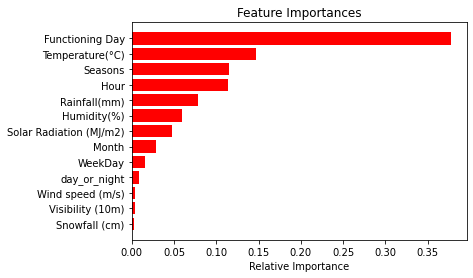

In [100]:
#all the features of the X_train are stored in the features variable
features = X_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)

#Plotting the Feature Importances
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

The Best Features are: 
1. Functioning Day
2. Temperature
3. Hour

**Checking at what hour the demand is high as per the Random Forest Model on the testing dataset.**

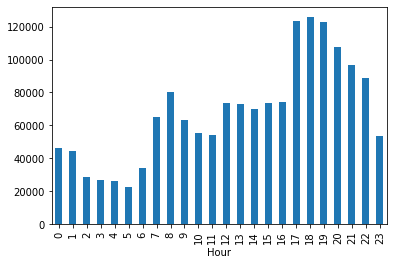

In [101]:
check=pd.DataFrame(X_test)
check['RentedCount']=predict_RF
check.groupby('Hour').sum()['RentedCount'].plot.bar()

**Conclusion:**Hence, at 8 AM in the morning and from 5pm to 8 pm the demand in very high. The is slight rise in demand at 10pm. These are the timings at which the bikes should be available in good number in order to decrease the waiting time.